# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/Medicare_GV_by_National_State_County_2022.csv")
df.head()

/var/folders/kl/7zsvfx5x2pb9zlnw9pvh5lc40000gn/T/ipykernel_58087/3560898714.py:1: DtypeWarning: Columns (223,224) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Medicare_GV_by_National_State_County_2022.csv")


,YEAR,BENE_GEO_LVL,BENE_GEO_DESC,BENE_GEO_CD,BENE_AGE_LVL,BENES_TOTAL_CNT,BENES_WTH_PTAPTB_CNT,BENES_FFS_CNT,BENES_MA_CNT,MA_PRTCPTN_RATE,...,PQI11_BCTRL_PNA_AGE_LT_65,PQI11_BCTRL_PNA_AGE_65_74,PQI11_BCTRL_PNA_AGE_GE_75,PQI12_UTI_AGE_LT_65,PQI12_UTI_AGE_65_74,PQI12_UTI_AGE_GE_75,PQI15_ASTHMA_AGE_LT_40,PQI16_LWRXTRMTY_AMPUTN_AGE_LT_65,PQI16_LWRXTRMTY_AMPUTN_AGE_65_74,PQI16_LWRXTRMTY_AMPUTN_AGE_GE_75
0,2014,National,National,NaN,All,56767775,49302821,33462969,15839852,0.3213,...,686,499,1373,361,269,1120,286,147,50,47
1,2014,National,National,NaN,<65,9286837,7824336,5867170,1957166,0.2501,...,686,NaN,NaN,361,NaN,NaN,286,147,NaN,NaN
2,2014,National,National,NaN,>=65,47480938,41478485,27595799,13882686,0.3347,...,NaN,499,1373,NaN,269,1120,NaN,NaN,50,47
3,2014,State,AK,2.0,All,84573,71860,71383,477,0.0066,...,622,366,1271,181,152,703,*,130,*,72
4,2014,State,AK,2.0,<65,13294,11641,11578,63,0.0054,...,622,NaN,NaN,181,NaN,NaN,*,130,NaN,NaN


2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

The data dictionary documents that when the user count is less than 11, the variables are suppressed. From looking at the head, missing numeric values are labeled as NaN. For categorical values, the term and variables names are given with a list of the possible options. For example, Age levels are "All", <65 or >=65. The data dictionary is helpful for seeing what values are possible and what each column header means, but it would be useful to have more information on how missing values are handled. 

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

In [3]:
df = df[["YEAR", "BENE_GEO_DESC", "BENE_AGE_LVL", "BENES_TOTAL_CNT", "BENE_AVG_AGE", "BENE_AVG_RISK_SCRE", "TOT_MDCR_PYMT_PC", "BENE_GEO_LVL"]]
df.head()

,YEAR,BENE_GEO_DESC,BENE_AGE_LVL,BENES_TOTAL_CNT,BENE_AVG_AGE,BENE_AVG_RISK_SCRE,TOT_MDCR_PYMT_PC,BENE_GEO_LVL
0,2014,National,All,56767775,71,1,9767,National
1,2014,National,<65,9286837,51,1.14,10732.16,National
2,2014,National,>=65,47480938,76,0.97,9561.79,National
3,2014,AK,All,84573,70,0.81,8602.11,State
4,2014,AK,<65,13294,51,1.01,10572.99,State


In [4]:
df = df.rename(columns = {'BENE_GEO_DESC':'location',
                    'BENE_AGE_LVL':'age_category',
                    'BENES_TOTAL_CNT':'total_beneficiaries',
                    'BENE_AVG_AGE':'average_age',
                    'BENE_AVG_RISK_SCRE': 'risk_score',
                    'TOT_MDCR_PYMT_PC': 'payment_per_capita'}) # Rename variables

In [5]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns, '\n') # Column names

(30273, 8) 

YEAR                    int64
location               object
age_category           object
total_beneficiaries    object
average_age            object
risk_score             object
payment_per_capita     object
BENE_GEO_LVL           object
dtype: object 

Index(['YEAR', 'location', 'age_category', 'total_beneficiaries',
       'average_age', 'risk_score', 'payment_per_capita', 'BENE_GEO_LVL'],
      dtype='object') 



In [6]:
df['total_beneficiaries'] = pd.to_numeric(df['total_beneficiaries'], errors='coerce')
df['average_age'] = pd.to_numeric(df['average_age'], errors='coerce')
df['risk_score'] = pd.to_numeric(df['risk_score'], errors='coerce')
df['payment_per_capita'] = pd.to_numeric(df['payment_per_capita'], errors='coerce')

df['location'] = df['location'].astype("string")
df['age_category'] = df['age_category'].astype("string")
df['BENE_GEO_LVL'] = df['BENE_GEO_LVL'].astype("string")



In [7]:
print(df.dtypes, '\n')

YEAR                            int64
location               string[python]
age_category           string[python]
total_beneficiaries           float64
average_age                   float64
risk_score                    float64
payment_per_capita            float64
BENE_GEO_LVL           string[python]
dtype: object 



In [8]:
df.head()

,YEAR,location,age_category,total_beneficiaries,average_age,risk_score,payment_per_capita,BENE_GEO_LVL
0,2014,National,All,56767775.0,71.0,1.00,9767.00,National
1,2014,National,<65,9286837.0,51.0,1.14,10732.16,National
2,2014,National,>=65,47480938.0,76.0,0.97,9561.79,National
3,2014,AK,All,84573.0,70.0,0.81,8602.11,State
4,2014,AK,<65,13294.0,51.0,1.01,10572.99,State


In [9]:
df = df.loc[(df['BENE_GEO_LVL'] == "State") & (df['age_category'] == "All")]
print(df['location'].value_counts(), '\n') #
df

location
AK           9
IL           9
AR           9
AZ           9
CA           9
CO           9
CT           9
DC           9
DE           9
FL           9
GA           9
HI           9
IA           9
MT           9
AL           9
IN           9
KS           9
KY           9
LA           9
MA           9
MD           9
ME           9
MI           9
MN           9
MO           9
MS           9
ID           9
NC           9
SC           9
SD           9
NH           9
NJ           9
NM           9
NV           9
NY           9
OH           9
OK           9
OR           9
PA           9
PR           9
RI           9
ND           9
NE           9
TN           9
TX           9
Territory    9
UT           9
VA           9
VI           9
VT           9
WA           9
WI           9
WV           9
WY           9
ZZ           9
Name: count, dtype: Int64 



,YEAR,location,age_category,total_beneficiaries,average_age,risk_score,payment_per_capita,BENE_GEO_LVL
3,2014,AK,All,84573.0,70.0,0.81,8602.11,State
36,2014,AL,All,994352.0,70.0,0.98,8655.37,State
107,2014,AR,All,614341.0,70.0,0.94,8280.93,State
186,2014,AZ,All,1147495.0,72.0,0.91,8889.60,State
205,2014,CA,All,5760925.0,72.0,1.01,10781.54,State
...,...,...,...,...,...,...,...,...
30065,2022,WA,All,1525506.0,73.0,0.92,9866.73,State
30108,2022,WI,All,1312254.0,72.0,0.97,10205.24,State
30184,2022,WV,All,466247.0,71.0,1.00,10587.76,State
30243,2022,WY,All,126529.0,72.0,0.81,10048.01,State


In [10]:
df = df[["YEAR", "location", "total_beneficiaries", "average_age", "risk_score", "payment_per_capita"]]
df = df.rename(columns = {'YEAR':'year', 'location': 'state'})
df = df.drop(df[df['state'] == "ZZ"].index)
df = df.drop(df[df['state'] == "Territory"].index)
df

,year,state,total_beneficiaries,average_age,risk_score,payment_per_capita
3,2014,AK,84573.0,70.0,0.81,8602.11
36,2014,AL,994352.0,70.0,0.98,8655.37
107,2014,AR,614341.0,70.0,0.94,8280.93
186,2014,AZ,1147495.0,72.0,0.91,8889.60
205,2014,CA,5760925.0,72.0,1.01,10781.54
...,...,...,...,...,...,...
30047,2022,VT,165721.0,72.0,0.83,10228.34
30065,2022,WA,1525506.0,73.0,0.92,9866.73
30108,2022,WI,1312254.0,72.0,0.97,10205.24
30184,2022,WV,466247.0,71.0,1.00,10587.76


I chose to keep year, state, total beneficiaries, average age, risk score, and payment per capita. I think that these metrics provide a good summary of findings and cover some of the breadth of the study. In other words, these variables are jointly interesting because they show a comprehensive overview of patient need, demographics, and finances. I chose to keep the year variable to show changes over time and narrowed down to just the states to be able to compare progress throughout the country. 

5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

In [11]:
df_2022 = df.loc[(df['year']==2022)]
df_2022

,year,state,total_beneficiaries,average_age,risk_score,payment_per_capita
26910,2022,AK,117023.0,71.0,0.82,10833.20
26944,2022,AL,1136151.0,72.0,1.02,11300.40
27015,2022,AR,691982.0,72.0,0.99,10705.38
27094,2022,AZ,1494975.0,74.0,0.92,10823.71
27113,2022,CA,6936781.0,73.0,1.03,14511.77
27175,2022,CO,1030117.0,72.0,0.89,10409.66
27243,2022,CT,740388.0,74.0,1.07,14241.64
27256,2022,DC,98990.0,72.0,1.09,13753.56
27260,2022,DE,240663.0,73.0,0.99,12068.92
27267,2022,FL,5144675.0,74.0,1.10,12860.11


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

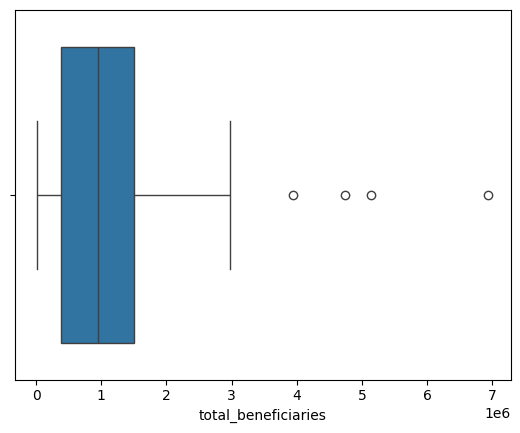

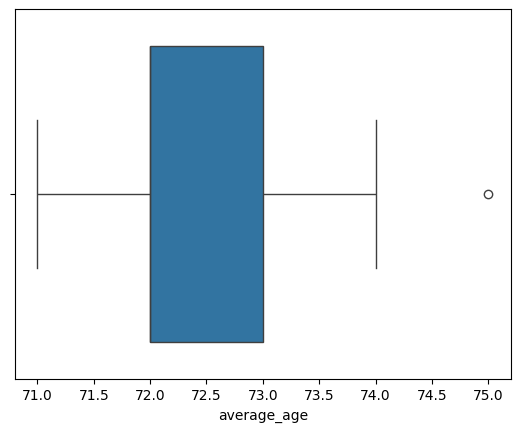

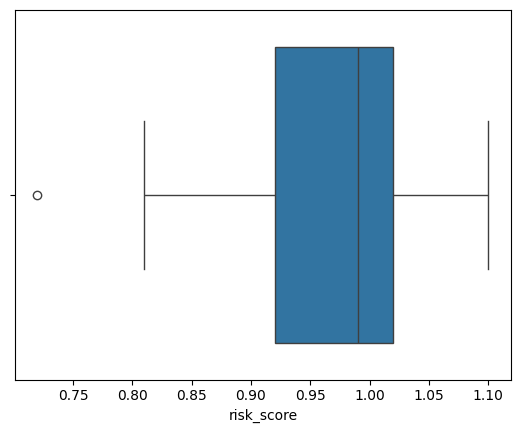

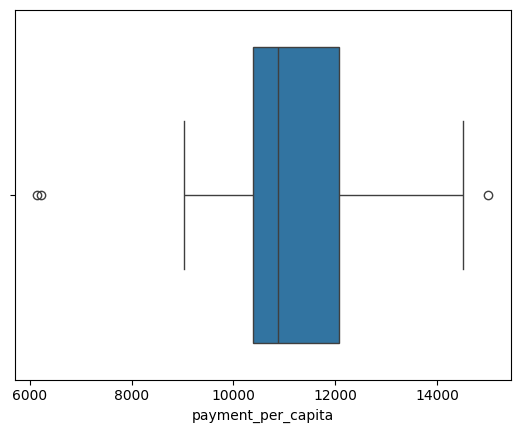

In [13]:
numeric_variables = ["total_beneficiaries", "average_age", "risk_score", "payment_per_capita"]
for var in numeric_variables:
    plt.figure()
    sns.boxplot(df_2022, x=var)
    plt.show()


There are outliers in each plot, but the beneficiary and payment graphs have the most outliers. 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, 'PR'),
  Text(1, 0, 'VI'),
  Text(2, 0, 'MT'),
  Text(3, 0, 'HI'),
  Text(4, 0, 'ID'),
  Text(5, 0, 'OR'),
  Text(6, 0, 'NM'),
  Text(7, 0, 'WA'),
  Text(8, 0, 'WY'),
  Text(9, 0, 'ME'),
  Text(10, 0, 'IA'),
  Text(11, 0, 'WI'),
  Text(12, 0, 'VT'),
  Text(13, 0, 'ND'),
  Text(14, 0, 'CO'),
  Text(15, 0, 'SD'),
  Text(16, 0, 'NC'),
  Text(17, 0, 'VA'),
  Text(18, 0, 'NH'),
  Text(19, 0, 'WV'),
  Text(20, 0, 'TN'),
  Text(21, 0, 'AR'),
  Text(22, 0, 'SC'),
  Text(23, 0, 'UT'),
  Text(24, 0, 'AZ'),
  Text(25, 0, 'AK'),
  Text(26, 0, 'KY'),
  Text(27, 0, 'OH'),
  Text(28, 0, 'MO'),
  Text(29, 0, 'KS'),
  Text(30, 0, 'NE'),
  Text(31, 0, 'AL'),
  Text(32, 0, 'RI'),
  Text(3

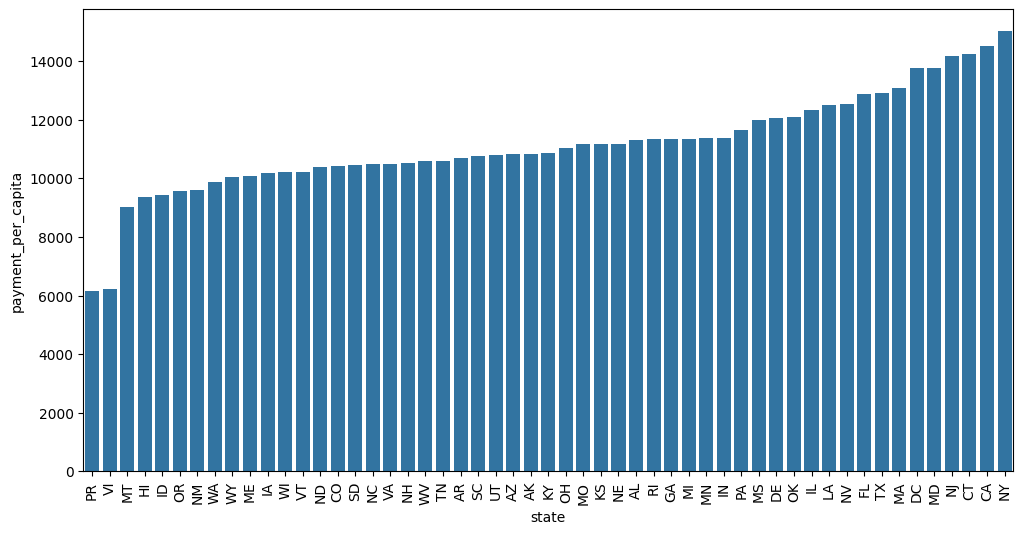

In [14]:
df_sorted = df_2022.sort_values(by='payment_per_capita')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='state', y='payment_per_capita')
plt.xticks(rotation=90)


6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 

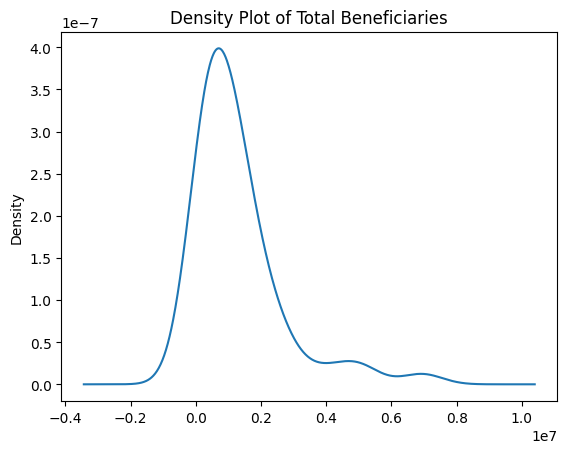

In [17]:
df_2022["total_beneficiaries"].plot.density()
plt.title("Density Plot of Total Beneficiaries")
plt.show()

The plot shows that the total beneficiaries does not vary widely by state. The results do not require scaling. 

7. Create a scatter plot, and describe the relationship you see.

<Axes: xlabel='risk_score', ylabel='payment_per_capita'>

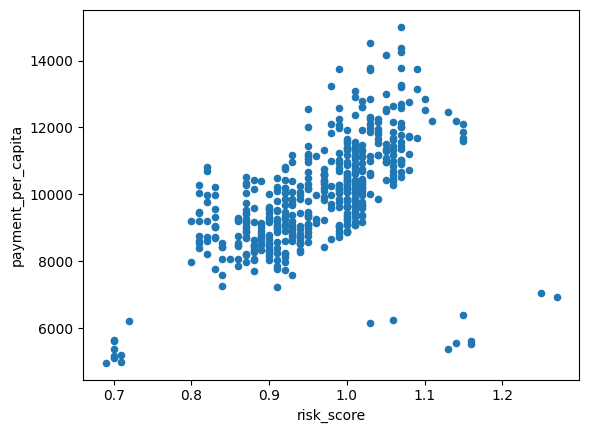

In [23]:
df.plot.scatter(x='risk_score', y='payment_per_capita')


The payment per capita increases pretty steadily as the risk goes up which makes sense because the HCC risk score is an indication of future healthcare costs. 

8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [24]:
df.describe()

,year,total_beneficiaries,average_age,risk_score,payment_per_capita
count,477.0000,4.770000e+02,477.000000,477.000000,477.00000
mean,2018.0000,1.173428e+06,71.702306,0.962600,9959.74956
std,2.5847,1.243101e+06,1.042911,0.086035,1620.15236
min,2014.0000,1.951900e+04,69.000000,0.690000,4972.35000
25%,2016.0000,3.411110e+05,71.000000,0.910000,8956.10000
50%,2018.0000,8.205010e+05,72.000000,0.980000,9908.12000
75%,2020.0000,1.418401e+06,72.000000,1.020000,10984.07000
max,2022.0000,6.936781e+06,75.000000,1.270000,15007.92000


The counts are all 477, which is a good sign that there are no null or missing values. The standard deviation is high for total beneficiaries is high, which indicates that there is a lot of variance between states and years. The average age has much less variance which makes sense since medicare is meant for older people. Payments are also variable, which is not surprising since different treatments vary in costs and people have varying needs. 